In [1]:
from tensorflow import keras

# 1) Autoencoders for Feature Extraction
An autoencoder is a neural network model that seeks to learn a compressed representation of an input.

An autoencoder is a neural network that is trained to attempt to copy its input to its output.

Input data from the domain can then be provided to the model and the output of the model at the bottleneck can be used as a feature vector in a supervised learning model, for visualization, or more generally for dimensionality reduction.

___________________
The autoencoder consists of two parts: the encoder and the decoder. The encoder learns how to interpret the input and compress it to an internal representation defined by the bottleneck layer. The decoder takes the output of the encoder (the bottleneck layer) and attempts to recreate the input.
_________________

We will use the make_classification() scikit-learn function to define a synthetic binary (2-class) classification task with 100 input features (columns) and 1,000 examples (rows). Importantly, we will define the problem in such a way that most of the input variables are redundant (90 of the 100 or 90 percent), allowing the autoencoder later to learn a useful compressed representation.

In [3]:
from tensorflow.keras.layers import BatchNormalization
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 100) (1000,)


### Lets develop a Multilayer Perceptron (MLP) autoencoder model!

The model will take all of the input columns, then output the same values. It will learn to recreate the input pattern exactly.

In this first autoencoder, we won’t compress the input at all and will use a bottleneck layer the same size as the input. This should be an easy problem that the model will learn nearly perfectly and is intended to confirm our model is implemented correctly

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

We will define the encoder to have two hidden layers, the first with two times the number of inputs (e.g. 200) and the second with the same number of inputs (100), followed by the bottleneck layer with the same number of inputs as the dataset (100).

To ensure the model learns well, we will use batch normalization and leaky ReLU activation.

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
n_inputs = 100
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

In [10]:
...
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [11]:
...
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

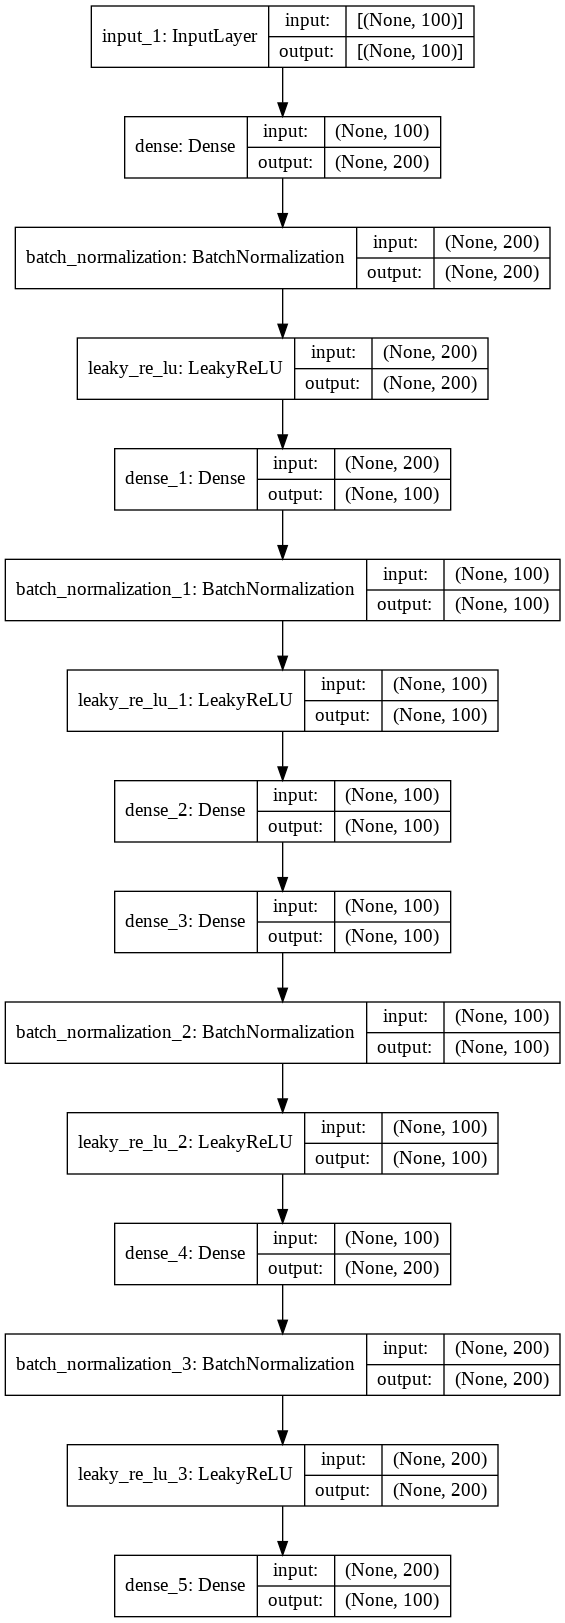

In [12]:
...
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

In [13]:
...
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/200
42/42 - 2s - loss: 0.2382 - val_loss: 0.1835
Epoch 2/200
42/42 - 0s - loss: 0.0399 - val_loss: 0.1093
Epoch 3/200
42/42 - 0s - loss: 0.0250 - val_loss: 0.0580
Epoch 4/200
42/42 - 0s - loss: 0.0186 - val_loss: 0.0314
Epoch 5/200
42/42 - 0s - loss: 0.0164 - val_loss: 0.0204
Epoch 6/200
42/42 - 0s - loss: 0.0140 - val_loss: 0.0139
Epoch 7/200
42/42 - 0s - loss: 0.0131 - val_loss: 0.0116
Epoch 8/200
42/42 - 0s - loss: 0.0118 - val_loss: 0.0083
Epoch 9/200
42/42 - 0s - loss: 0.0110 - val_loss: 0.0068
Epoch 10/200
42/42 - 0s - loss: 0.0106 - val_loss: 0.0075
Epoch 11/200
42/42 - 0s - loss: 0.0110 - val_loss: 0.0062
Epoch 12/200
42/42 - 0s - loss: 0.0107 - val_loss: 0.0061
Epoch 13/200
42/42 - 0s - loss: 0.0094 - val_loss: 0.0057
Epoch 14/200
42/42 - 0s - loss: 0.0092 - val_loss: 0.0046
Epoch 15/200
42/42 - 0s - loss: 0.0087 - val_loss: 0.0055
Epoch 16/200
42/42 - 0s - loss: 0.0084 - val_loss: 0.0045
Epoch 17/200
42/42 - 0s - loss: 0.0081 - val_loss: 0.0048
Epoch 18/200
42/42 - 0s

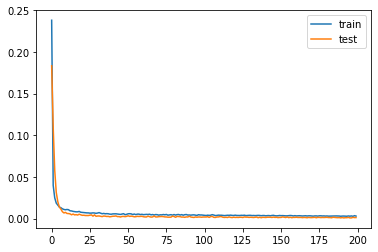

In [15]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

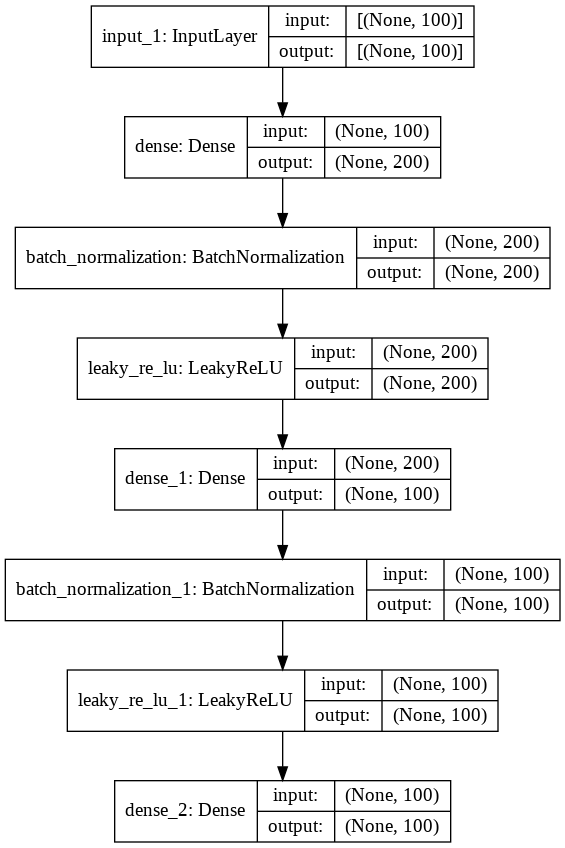

In [17]:
from tensorflow.keras.utils import plot_model
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)

In [18]:
# save the encoder to file
encoder.save('encoder.h5')

So far, so good. We know how to develop an autoencoder without compression.

Next, let’s change the configuration of the model so that the bottleneck layer has half the number of nodes (e.g. 50).

In [19]:
...
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)

Epoch 1/200
42/42 - 2s - loss: 0.2238 - val_loss: 0.1899
Epoch 2/200
42/42 - 0s - loss: 0.0350 - val_loss: 0.1022
Epoch 3/200
42/42 - 0s - loss: 0.0224 - val_loss: 0.0527
Epoch 4/200
42/42 - 0s - loss: 0.0180 - val_loss: 0.0295
Epoch 5/200
42/42 - 0s - loss: 0.0155 - val_loss: 0.0190
Epoch 6/200
42/42 - 0s - loss: 0.0135 - val_loss: 0.0141
Epoch 7/200
42/42 - 0s - loss: 0.0125 - val_loss: 0.0112
Epoch 8/200
42/42 - 0s - loss: 0.0114 - val_loss: 0.0083
Epoch 9/200
42/42 - 0s - loss: 0.0109 - val_loss: 0.0078
Epoch 10/200
42/42 - 0s - loss: 0.0109 - val_loss: 0.0064
Epoch 11/200
42/42 - 0s - loss: 0.0103 - val_loss: 0.0064
Epoch 12/200
42/42 - 0s - loss: 0.0093 - val_loss: 0.0067
Epoch 13/200
42/42 - 0s - loss: 0.0098 - val_loss: 0.0068
Epoch 14/200
42/42 - 0s - loss: 0.0089 - val_loss: 0.0052
Epoch 15/200
42/42 - 0s - loss: 0.0089 - val_loss: 0.0057
Epoch 16/200
42/42 - 0s - loss: 0.0087 - val_loss: 0.0047
Epoch 17/200
42/42 - 0s - loss: 0.0086 - val_loss: 0.0040
Epoch 18/200
42/42 - 0s

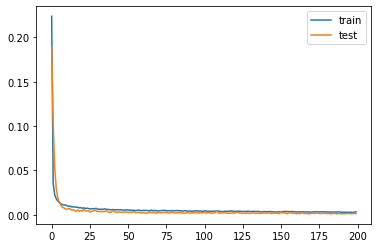

In [21]:
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In this case, we see that loss gets similarly low as the above example without compression, suggesting that perhaps the model performs just as well with a bottleneck half the size.

The trained encoder is saved to the file “encoder.h5” that we can load and use later.



Next, let’s explore how we might use the trained encoder model.

# **Encoder as Data Preparation for Predictive Model**

In this section, we will use the trained encoder from the autoencoder to compress input data and train a different predictive model.

First, let’s establish a baseline in performance on this problem. This is important as if the performance of a model is not improved by the compressed encoding, then the compressed encoding does not add value to the project and should not be used.

We can train a logistic regression model on the training dataset directly and evaluate the performance of the model on the holdout test set.

In [22]:
# baseline in performance with logistic regression model
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = LogisticRegression()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8939393939393939


Running the example fits a logistic regression model on the training dataset and evaluates it on the test set.
We would hope and expect that a logistic regression model fit on an encoded version of the input to achieve better accuracy for the encoding to be considered useful.

We can update the example to first encode the data using the encoder model trained in the previous section.

First, we can load the trained encoder model from the file.

In [25]:
from keras.models import load_model
# load the model from file
encoder = load_model('encoder.h5')

We can then use the encoder to transform the raw input data (e.g. 100 columns) into bottleneck vectors (e.g. 50 element vectors).

In [26]:
...
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

In [28]:
# We can then use this encoded data to train and evaluate the logistic regression model, as before.
...
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
# Running the example first encodes the dataset using the encoder, then fits a logistic regression model on the training dataset and evaluates it on the test set.
# evaluate logistic regression on encoded input
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
# define dataset
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=90, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# load the model from file
encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.9333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


This is a better classification accuracy than the same model evaluated on the raw dataset, suggesting that the encoding is helpful for our chosen model and test harness